In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('../3-Data_Cleaning/movies_half.csv')

In [3]:
data

,电影名,导演,编剧,演员,类型,电影时长(分钟),上映时间(年),评分
0,角斗士 Gladiator,雷德利·斯科特,"大卫·弗兰佐尼,约翰·洛根,威廉姆·尼克尔森","罗素·克劳,华金·菲尼克斯,康妮·尼尔森,奥列佛·里德,理查德·哈里斯,德里克·雅各比,杰曼...",剧情,155,2000,8.5
1,外出就餐3：饕餮自助 Eating Out 3: All You Can Eat,葛伦·盖洛,"菲利普·J·巴特尔,亚伦·布洛卡","利百加·科汉,克里斯·萨尔瓦多,迈克尔E.R.沃克,敏科·斯荳,莱斯利·乔丹,素玛立·蒙塔诺...",喜剧,80,2009,6.6
2,蝴蝶效应2 The Butterfly Effect 2,约翰·R·莱昂耐迪,Michael D. Weiss,"埃里克·里夫利,埃莉卡·杜兰斯,达斯汀·米利甘,吉娜·赫尔顿,林赛·麦克斯维尔",剧情,92,2006,6.1
3,铁血柔情 Love Me Tender,罗伯特·D·韦布,"莫里斯·杰拉蒂,罗伯特·巴克纳","Richard Egan,Debra Paget,Elvis Presley",剧情,89,1956,7.2
4,冰川时代 Ice Age,卡洛斯·沙尔丹哈,"迈克尔·伯格 ,迈克尔·J·威尔森,彼得·阿克曼","雷·罗马诺,约翰·雷吉扎莫,丹尼斯·利瑞,杰克·布莱克",喜剧,81,2002,8.6
5,危情雪夜,陈国星,郝建,"陶泽如,吴越,高明,何冰,马伊琍,张涵予",剧情,84,2004,5.9
6,李尔王 Great Performances: King Lear,特雷弗·纳恩,莎士比亚,"伊恩·麦克莱恩,菲利普·文切斯特,弗兰西斯·巴贝,莫妮卡·杜兰,萝玛拉·嘉瑞,西尔维斯特·迈...",剧情,150,2008,8.3
7,极限特工2 xXx: State of the Union,李·塔玛霍瑞,西蒙·金伯格,"艾斯·库珀,塞缪尔·杰克逊,威廉·达福,斯科特·斯比德曼,彼得·斯特劳斯,桑妮·马布雷,诺娜·加耶",动作,101,2005,6.6
8,大逃杀 バトル・ロワイアル,深作欣二,"深作健太,高见广春","藤原龙也,前田亚季,山本太郎,北野武,栗山千明,高冈奏辅,塚本高史,小谷幸弘,石川绘里,神谷...",剧情,114,2000,8.0
9,蜀山奇侠,萧笙,"林少枝,钟政良,吴玉章,曾广平","杨宝玲,李婉华,李丽丽,龚慈恩,关礼杰",爱情,120,1990,8.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 8 columns):
电影名         6141 non-null object
导演          6141 non-null object
编剧          6141 non-null object
演员          6141 non-null object
类型          6141 non-null object
电影时长(分钟)    6141 non-null int64
上映时间(年)     6141 non-null int64
评分          6141 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 383.9+ KB


In [5]:
# 1.构建编剧矩阵

#编剧列表嵌套解除嵌套并去重
list_Scriptweiter = data["编剧"].str.split(",").tolist()
list_Scriptweiters = list(set([i for j in list_Scriptweiter for i in j]))

#构建编剧为0的矩阵
zeros_data = pd.DataFrame(np.zeros((data.shape[0],len(list_Scriptweiters))),columns=list_Scriptweiters)

#给每个电影出现编剧的位置加1,构建全新矩阵
for i in range(data.shape[0]):
    zeros_data.loc[i,list_Scriptweiter[i]] = 1

#查看编剧矩阵    
zeros_data

,,宁浩,小威廉·保尔斯,托尼·库什纳,顾长卫,米科·马克拉,马可·贝洛基奥,Cinqué Lee,钟英伟,约翰·布瑞雷,...,诺尔·亚历杭德罗,Keith Lansdale,安妮·玛莫罗,牛莉,达里亚·尼科洛迪,安妮·佩尔埃涅,宋亚轩,詹姆斯·奥尔,宋捷,小约翰·W·坎贝尔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 2.拼接编剧矩阵和评分

#获取评分并转换为列表
Score = list(data['评分'])

#转换评分列表并拼接数据
data_Score = pd.DataFrame(Score,columns=['评分'])
data_zeros = pd.concat([zeros_data,data_Score],axis=1)

#查看全新数据
data_zeros

,,宁浩,小威廉·保尔斯,托尼·库什纳,顾长卫,米科·马克拉,马可·贝洛基奥,Cinqué Lee,钟英伟,约翰·布瑞雷,...,Keith Lansdale,安妮·玛莫罗,牛莉,达里亚·尼科洛迪,安妮·佩尔埃涅,宋亚轩,詹姆斯·奥尔,宋捷,小约翰·W·坎贝尔,评分
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.6
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2


In [7]:
# 3.拼接演员与平均评分

#将演员的总票房算出并添加至列表
AverageScore = []
for i in list_Scriptweiters:
    AverageScore.append((data_zeros[data_zeros.loc[:,i]!=0]['评分'].sum())/(len(data_zeros[data_zeros.loc[:,i]!=0])))
    
#拼接列表为Dataframe
datas = pd.DataFrame({"编剧":list_Scriptweiters,"平均评分":AverageScore})

#按评分大小逆序排序,取出平均评分前10的编剧数据
Scriptweiters_ten = datas.sort_values(by='平均评分',ascending=False).head(10)['编剧'].values
AverageScore_ten = datas.sort_values(by='平均评分',ascending=False).head(10)['平均评分'].values

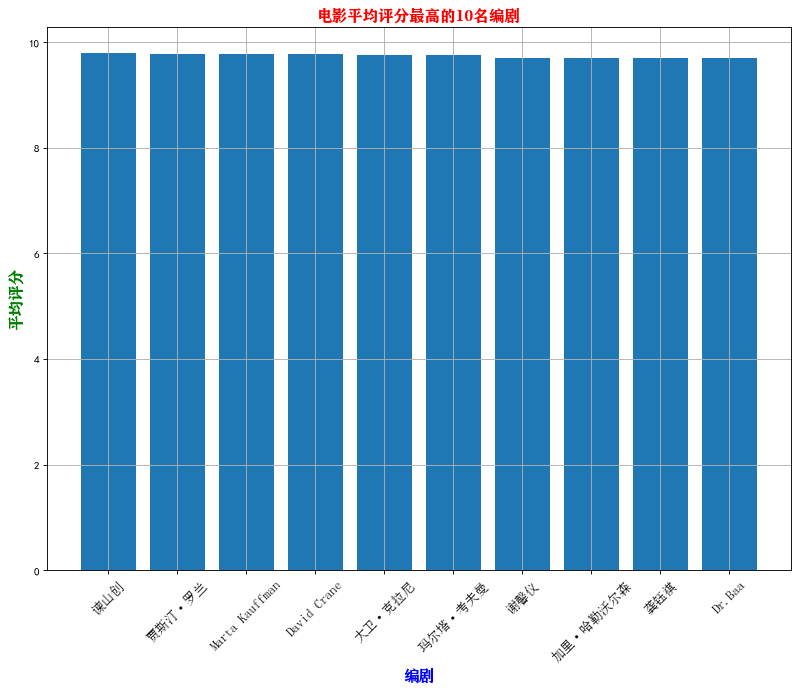

In [8]:
# 4.绘制图片

#设置图片大小
plt.figure(figsize=(12,9),dpi=80)

#设置字体
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=12)
my_fonts = FontProperties(fname=r"C:\Windows\Fonts\方正粗黑宋简体.ttf", size=14)

#绘制图片
plt.bar(Scriptweiters_ten,AverageScore_ten,width=0.8)

#设置x轴的刻度
plt.xticks(Scriptweiters_ten,Scriptweiters_ten,fontproperties=my_font,rotation=45)

#绘制表格
plt.grid(alpha=1) #alpha是表格透明度

#添加描述信息
plt.xlabel("编剧",fontproperties=my_fonts,color='blue')
plt.ylabel("平均评分",fontproperties=my_fonts,color='green')
plt.title("电影平均评分最高的10名编剧",fontproperties=my_fonts,color='red')

#保存图片
plt.savefig("./电影平均评分最高的10名编剧.png") #保存为.svg格式矢量图，不会有失帧

#展示图片
plt.show()